Import necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Load the dataset

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

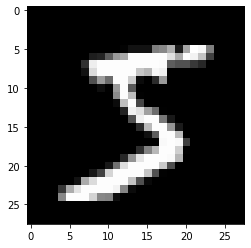

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
y_train[0]

5

Explore the images

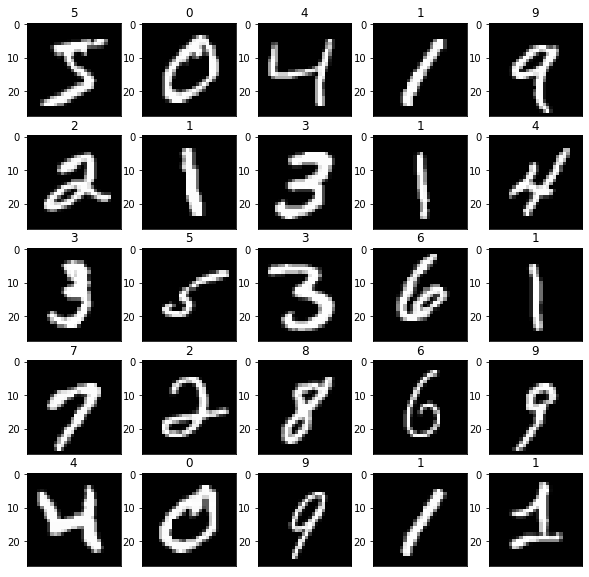

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.title(y_train[i])

Explore the test images

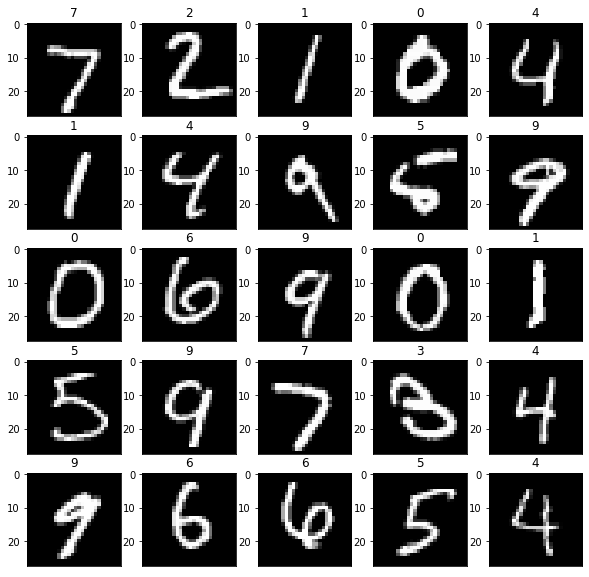

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.title(y_test[i])

Scale the data

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Add the layer to the data

In [ ]:
x_train = x_train.reshape(-1,28,28,1)

In [ ]:
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Build the CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# First pair of convolution and pooling
model.add(Conv2D(filters=32, input_shape=(28,28,1), activation='relu',
          kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# Second pair of convolution and pooling
model.add(Conv2D(filters=64, activation='relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the data
model.add(Flatten())

# Add the hidden layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 14s 4ms/step - loss: 0.1412 - accuracy: 0.9568
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0421 - accuracy: 0.9871
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 4/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 5/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0169 - accuracy: 0.9944
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 7/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0109 - accuracy: 0.9963
Epoch 8/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 10/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.00

Evaluate the model

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.0327 - accuracy: 0.9915


[0.03271326422691345, 0.9915000200271606]

Predict the result on unseen data

In [ ]:
new = x_test[7456]

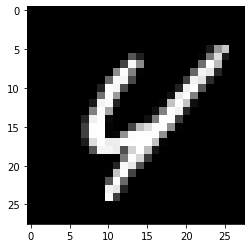

In [ ]:
plt.imshow(new, cmap='gray')

In [ ]:
new.shape

(28, 28, 1)

In [ ]:
new = new.reshape(1,28,28,1)

In [ ]:
np.argmax(model.predict(new, verbose=False))

4